In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [26]:
data = pd.read_csv("ex2data1.txt",header = None)
X = data.iloc[:,0:2]
y = data.iloc[:,2]

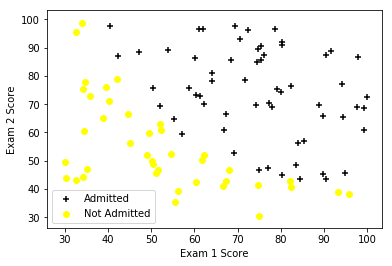

In [27]:
mask = y == 1
adm = plt.scatter(X[mask][0], X[mask][1],c = 'black',marker = '+')
notadm = plt.scatter(X[~mask][0], X[~mask][1],c = 'yellow')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend((adm,notadm),('Admitted','Not Admitted'))
plt.show()

In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [29]:
def costfunc(theta,X,y):
    h = np.dot(X,theta)
    h = sigmoid(h)
    cost = np.sum(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))
    return -cost/m

In [30]:
def gradientDescent(X,y,theta,alpha,itr):
    for i in range(itr):
        h = np.dot(X,theta)
        h = sigmoid(h)
        diff = h - y
        derivative = np.dot(X.T,diff)
        theta = theta - (alpha/m)*derivative
    return theta

In [31]:
def gradient(theta,X,y):
    return (1/m)*np.dot(X.T,(sigmoid(np.dot(X,theta)) - y))

In [32]:
def accuracy(X,y,theta,cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= 0.5]
    acc = np.mean(pred == y.flatten()) * 100
    print(acc,"%")

In [33]:
y = y[:,np.newaxis]
(m,n) = X.shape
theta = np.zeros((n+1,1))
ones = np.ones((m,1))
X = np.hstack((ones,X))
cost = costfunc(theta,X,y)
print(cost)

0.6931471805599453


In [34]:
theta = gradientDescent(X,y,theta,0.001,1500)
cost = costfunc(theta,X,y)
print(cost)

0.6225994137274374


In [35]:
theta = np.zeros((n+1,1))
temp = opt.fmin_tnc(func = costfunc,x0 = theta.flatten(),fprime = gradient,args = (X, y.flatten()))
theta = temp[0]
cost = costfunc(theta,X,y)
print(cost)

0.20349770158947436


In [36]:
accuracy(X,y.flatten(),theta,0.5)

89.0 %


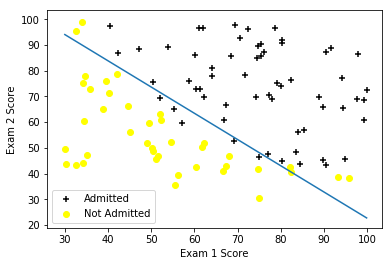

In [37]:
plot_x = [np.min(X[:,1]),np.max(X[:,1])]
plot_y = -((np.dot(theta[1],plot_x) + theta[0])/theta[2]);
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2],c = 'black',marker = '+')
notadm = plt.scatter(X[~mask][:,1], X[~mask][:,2],c = 'yellow')
plt.plot(plot_x,plot_y)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend((adm,notadm),('Admitted','Not Admitted'))
plt.show()